In [73]:
# Importing necessary libraries
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Loading the CSV file into a DataFrame
df= pd.read_csv("c:/Users/sanma/Downloads/Iris (1).csv")
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

Mean: 5.84
Median: 5.80
Standard Deviation: 0.83
Skewness: 0.31
Kurtosis: -0.55


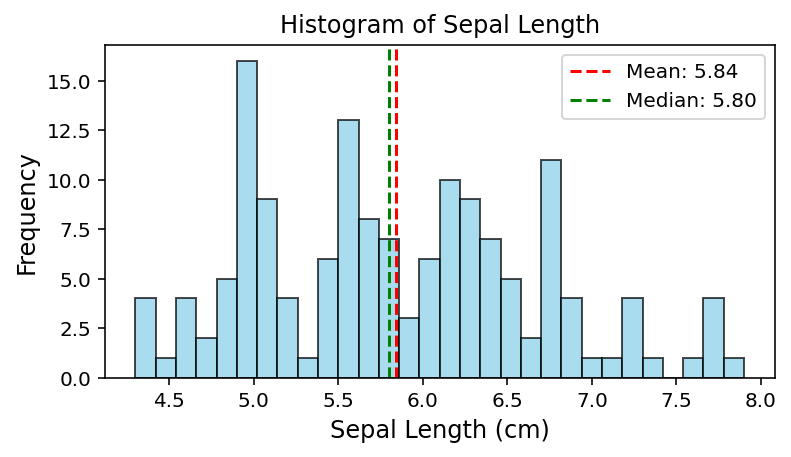

In [79]:
def plot_histogram_with_stats(data, xlabel, ylabel, title, bins=20, color='blue', edgecolor='black'):
    """
    Plots a histogram of the given data with annotations for mean, median, skewness, and kurtosis.

    Args:
        data: The data to be plotted.
        xlabel: The label for the x-axis.
        ylabel: The label for the y-axis.
        title: The title of the plot.
        bins: The number of bins to use in the histogram. 
        color: The color of the histogram bars.
        edgecolor: The color of the bin edges.
    """
    # Computing statistics
    stats = data.describe()
    mean = stats['mean']
    median = data.median()
    std = stats['std']
    skewness = data.skew()
    kurtosis = data.kurtosis()

    # Printing statistics
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Standard Deviation: {std:.2f}")
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")

    # Create the histogram with figure size and dpi
    plt.figure(figsize=(6, 3),dpi=144)
    # Plot the histogram
    plt.hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    # Plot Mean
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean:.2f}')
    # Plot Median
    plt.axvline(median, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {median:.2f}')
    # Set labels and title
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.title(title,fontsize=12)
    plt.legend()
    # Display the plot
    plt.show()

# Call the function to create the histogram
plot_histogram_with_stats(df['SepalLengthCm'], 'Sepal Length (cm)', 'Frequency', 'Histogram of Sepal Length')


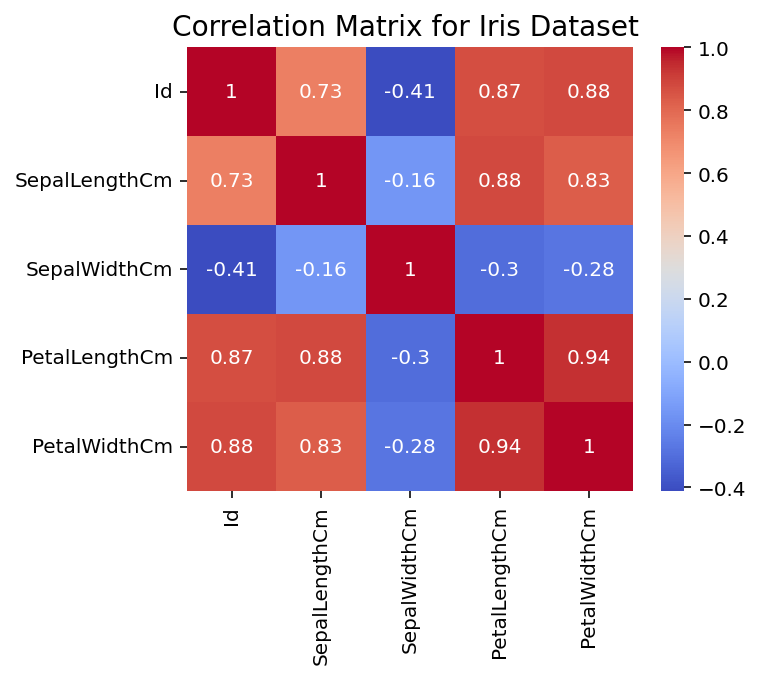

In [81]:
def plot_correlation_matrix(df, method='spearman'):
  """
  Plots the correlation matrix of the given DataFrame.

  Args:
    df: The DataFrame to calculate the correlation matrix for.
    method: The correlation method to use (e.g., 'pearson', 'kendall', 'spearman'). Defaults to 'pearson'.
  """

  # Selecting the numerical features 
  numeric_features = df.select_dtypes(include=[np.number])

  # Using the specified method to calculate the correlation matrix
  correlation_matrix = numeric_features.corr(method=method)

  # Create a heatmap by setting figure size and dpi
  plt.figure(figsize=(5, 4),dpi=144)
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  # Set the title
  plt.title('Correlation Matrix for Iris Dataset ',fontsize=14)
  # Display the plot
  plt.show()

# Call the function to create the heatmap 
plot_correlation_matrix(df, method='spearman')


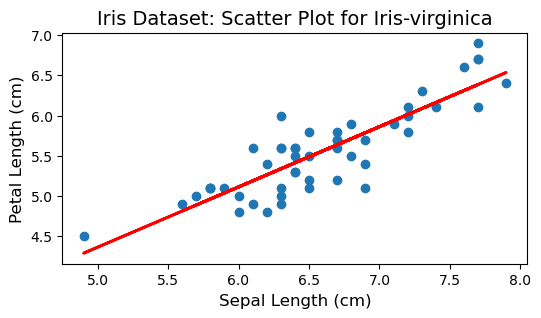

In [85]:
def plot_species_scatter_with_regression(df, species):
  """
  Plots a scatter plot of two features for a specific species with a fitted linear regression line.

  Args:
    df: The DataFrame containing the data.
    species: The name of the species to visualize.
  """


# Select a specific species 
species_to_plot = 'Iris-virginica'
df_species = df[df['Species'] == species_to_plot]

# Select two features to plot the scatter plot
X = df_species[['SepalLengthCm', 'PetalLengthCm']]

# Create the scatter plot by setting figure size and dpi
plt.figure(figsize=(6, 3))
plt.scatter(df_species['SepalLengthCm'], df_species['PetalLengthCm'])
# Set the labels and title
plt.xlabel('Sepal Length (cm)',fontsize=12)
plt.ylabel('Petal Length (cm)',fontsize=12)
plt.title(f'Iris Dataset: Scatter Plot for {species_to_plot}',fontsize=14)


# Fitting a linear regression line
model = LinearRegression().fit(X[['SepalLengthCm']], X['PetalLengthCm'])
y_pred = model.predict(X[['SepalLengthCm']])

# Plot the linear regression line
plt.plot(X['SepalLengthCm'], y_pred, color='red', linewidth=2)
# Display the plot
plt.show()

# Call the function to create the scatter plot
plot_species_scatter_with_regression(df, species_to_plot)


C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 2 clusters silhouette score = 0.44
 3 clusters silhouette score = 0.44


C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 4 clusters silhouette score = 0.41
 5 clusters silhouette score = 0.40


C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 6 clusters silhouette score = 0.39
 7 clusters silhouette score = 0.41


C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


 8 clusters silhouette score = 0.39
 9 clusters silhouette score = 0.42


C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


10 clusters silhouette score = 0.40
Best number of clusters =  2


C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

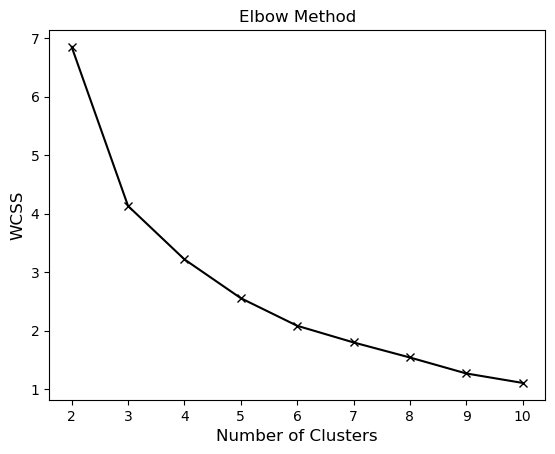

C:\Users\sanma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


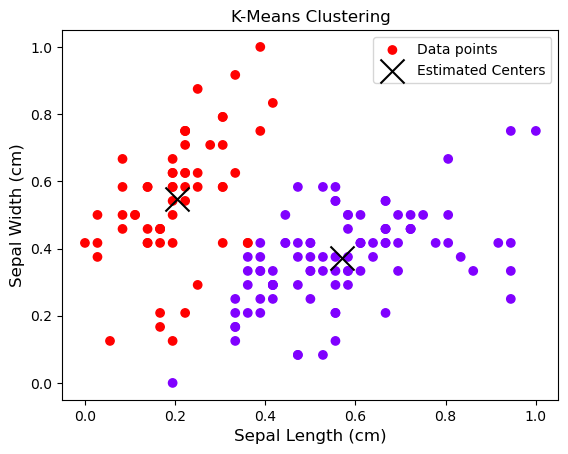

In [87]:
# Load and preprocess the Iris dataset
def load_and_preprocess_iris_data(data_path="c:/Users/sanma/Downloads/Iris (1).csv"):
    
    # Load the dataset
    df = pd.read_csv(data_path)

    # Selectin relevant features
    df_cut = df[['SepalLengthCm', 'SepalWidthCm']].copy()

    # Normalize the data
    scaler = MinMaxScaler()
    norm = scaler.fit_transform(df_cut)
    return norm

# Calculate silhouette score and inertia for a given number of clusters in K-Means
def one_silhoutte_inertia(n, xy):
    try:
        kmeans = KMeans(n_clusters=n, n_init=20, random_state=42)
        kmeans.fit(xy)
        labels = kmeans.labels_
        score = silhouette_score(xy, labels)
        inertia = kmeans.inertia_
        return score, inertia
    except ValueError:
        print(f"Error fitting K-Means for {n} clusters. Skipping...")
        return None, None

# To find the optimal number of clusters for K-Means using the silhouette score
def find_best_k_using_silhouette(data):
    wcss = []
    best_n, best_score = None, -np.inf

    for n in range(2, 11):  # 2 to 10 clusters
        score, inertia = one_silhoutte_inertia(n, data)
        if score is not None:
            wcss.append(inertia)
            if score > best_score:
                best_n = n
                best_score = score
            print(f"{n:2g} clusters silhouette score = {score:0.2f}")

    print(f"Best number of clusters = {best_n:2g}")
    return best_n, best_score

# Plot the elbow curve to visualize within-cluster sum of squares (WCSS) for different K values
def plot_elbow_curve(wcss):
    plt.plot(range(2, 11), wcss, marker='x', color='black')
    plt.title('Elbow Method', fontsize=12)
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('WCSS', fontsize=12)
    plt.show()

# Perform K-Means clustering with the specified number of clusters
def perform_k_means_clustering(data, n_clusters):
    scaler = MinMaxScaler()
    scaler.fit(data)  # Fit the scaler on the data
    kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_

    # Calculate cluster centers and inverse transform for visualization
    centers = scaler.inverse_transform(kmeans.cluster_centers_)
    return kmeans, labels, centers

# Visualize the K-Means clustering results
def visualize_k_means_clusters(data, labels, centers):
    fig, ax = plt.subplots()
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', label='Data points')
    ax.scatter(centers[:, 0], centers[:, 1], marker='x', s=300, c='black', label='Estimated Centers')
    ax.set_xlabel('Sepal Length (cm)', fontsize=12)
    ax.set_ylabel('Sepal Width (cm)', fontsize=12)
    ax.set_title('K-Means Clustering')
    ax.legend()
    plt.show()

# Load and normalize the Iris dataset
norm = load_and_preprocess_iris_data()
# To find the best number of clusters using the silhouette score
best_n, best_score = find_best_k_using_silhouette(norm)
# Setting range  for 2 to 10 clusters for the elbow curve and calculate WCSS
wcss = [one_silhoutte_inertia(n, norm)[1] for n in range(2, 11)]
# Plotting the elbow curve
plot_elbow_curve(wcss)
# To perform K-means clustering
kmeans_model, labels, centers = perform_k_means_clustering(norm, best_n)
# Visualising the cluster and their corresponding centers
visualize_k_means_clusters(norm, labels, centers)
